In [1]:
from dotenv import load_dotenv
from langchain_chroma import Chroma
from langchain_core.runnables import RunnablePassthrough
from langchain_openai import OpenAIEmbeddings, ChatOpenAI
from langchain_text_splitters import MarkdownHeaderTextSplitter
from IPython.display import Markdown
import os

In [2]:
context_r = f"""

## Litter surveys in Switzerland 2020-2021 - IQAASL

Identification, quantification and analysis of anthropogenic Swiss litter (IQAASL) is a project commissioned by the Swiss 
Federal Office for the Environment to collect data concerning visible pollutants along Swiss lakes and rivers. All 
discarded materials were collected and identified using litter survey techniques. in total there were 406 samples from 163 
locations in 95 municipalities.

This report is a summary and analysis of the litter surveys conducted and the methods employed in Switzerland from March
2020 through August 2021. This sampling phase overlaps with the Swiss Litter Report (SLR) survey period, which ran
from April 2017 to March 2018. The SLR was the first project on a national level to use the standard protocol described in 
the Guide to monitoring beach litter or any other comparable method. This overlap allows the results of the 
present study to be compared with those of the SLR.

## Lakes and rivers

The lakes and rivers were sampled from 2020-03 through 2021-05, a total of 54,744 objects were removed and classified over 
the course of 386 surveys. The survey locations were divided into survey areas for regional analysis and defined by the Aare, 
Rhône, Ticino and Linth/Limmat rivers. Surveys were conducted at 143 different locations, representing 77 municipalities. 
The total linear distance surveyed was 20 km with a surface area of 9 hectares and a total municipal population of 1.7 million.

Most surveys were along lake shorelines (331 samples) as lakes offer more consistent and safe year-round access with 
respect to rivers. Additionally, lakes are large areas of reduced flow that receive input from multiple rivers, streams 
and drainage systems providing ideal locations to assess the variety of objects in and around the water bodies.

In total 316 samples came from seven principal lakes in 3 major river basins. Twenty locations were selected to sample 
monthly for a twelve-month period with the exception of Lago Maggiore, which was sampled every three months. 
Surveys were also conducted on Lago di Lugano, Lac des Quatre cantons, Brienzersee and Zugersee. In addition, there 
were 55 surveys on 16 rivers.

### The sampling locations - type and description

The land use is reported as the percent of total area attributed to each land use category within a 1500m radius of the 
survey location. The ratio of the number of samples completed at the different land use profiles is an indicator of the 
environmental and economic conditions around the survey locations.

The land use around the survey locations had a higher attribution to buildings as opposed to agriculture and woods. For 
example, half of all the surveys had at least 37% of land use devoted to buildings as opposed to 19% for agriculture or 
13% to woods. Land use devoted to recreation was at least 6% for half of all samples.

The length of the road network within the buffer zone differentiates between locations that have other wise similar land 
use characteristics. The length of road per buffer ranges from 13km to 212km, 50% of the surveys had less than 67km of road network.

The number of intersections ranges from zero to 23, 50% of the surveys had 3 or fewer intersections within 1500m of the 
survey location. The size of the intersecting river or canal was not taken into consideration. Survey locations on rivers 
have zero intersections.

The population (not shown) is taken from statpop 2018 and represents the population of the municipality surrounding the 
survey location. The smallest population was 442 and the maximum was 415,367, 50% of the surveys come from 
municipalities with a population of at least 12,812.

Overall, surveys at locations with more buildings and more recreation sites were more likely to facilitate the accumulation 
of trash on the shoreline. When the most common objects are considered, only four of the twelve were found at higher rates 
in the presence of more buildings. All of those objects are likely related to food or tobacco consumption near the location. 
Suggesting that there are still gains to be made in prevention and attenuation efforts in areas of high traffic near the water.

However, six of the twelve objects have no positive association to land use attributed to buildings but were found in at 
least 50% of all the surveys. These objects are generally associated with professional use or in the case of cotton swabs 
personal hygiene:

* plastic construction waste
* fragmented plastics
* industrial sheeting
* expanded polystyrene
* cotton bud/swabs
* insulation, includes spray foams

Furthermore, compared to products related to tobacco or food consumption these objects have fewer positive associations in 
general. Indicating that the appropriate land use feature is not currently accounted for and/or these objects are found 
at similar quantities indifferent of the land use features. Suggesting that these objects are ubiquitous in the environment.

Finally, two of the twelve most common objects were found in less than 50% of the surveys and have few positive associations:

* industrial pellets
* expanded foams < 5mm

These objects are found in large quantities sporadically at specific locations. They have been found in all survey areas 
and in all lakes. Industrial pellets have a very specific use and client base making it possible to find partners based 
on the density of the pellets found and the location of the nearest consumer or producer of pellets, see Shared responsibility.

### Median survey total

The results are in units of pieces of litter per 100 meters (p/100m). The median survey result of all data was approximately
189 p/100m. The maximum recorded value was 6,617 p/100m (Rhône survey area) and the minimum recorded was 2p/100m (Aare survey area).
The Rhône survey area had the highest median survey total of 442p/100m, this can in part be explained by the high number
of urban survey locations with respect to the other survey areas and the deposition of fragmented plastics and foamed 
plastics at the Rhône River out flow in the upper lake region.

A reference value was calculated excluding the results from samples that were less than 10m and objects less than 2.5cm. 
This method, described in EU Marine Beach Litter Baselines was used to calculate the reference and threshold 
values for all European beaches in 2015 and 2016 resulting in a median value of 131 p/100m. The results from the European 
baseline value lie outside the 95% confidence interval (CI) of 147 - 213p/100m established using the data from IQAASL.

Surveys in Switzerland were on average, smaller scale than in marine environments and in locations that would be 
considered urban under most circumstances. To date monitoring of lakes and rivers upstream of coastal regions has 
not generalized on the European continent. However, there is a concerted effort by a group of associations in 
Switzerland and France to establish a common monitoring and data exchange protocol for the Rhône basin. Additionally, 
the Wageningen University & Research has begun analyzing data collected in the Meusse - Rhine delta using 
protocols like those in IQAASL.

### The most common objects

The most common objects are defined as those objects identified in at least 50% of all surveys and/or are among the ten 
most abundant by quantity. As a group the most common objects represent 68% of all objects identified in the sampling period. 
Of the most common items 27% are food, drink and tobacco related and 24% are infrastructure and agriculture related.

Objects related to food, drink and tobacco are identified at higher rates at survey locations with a greater percentage 
of land attributed to buildings or fixed infrastructure, the inverse is true of the locations with a higher percentage 
of land attributed to woods or agriculture. However, infrastructure material and fragmented plastics, are found at similar 
rates throughout all survey areas indifferent of land use surrounding the survey locations.

The most common objects identified in the surveys were:

* cigarette ends: total 8'485, % of all objects 15.5%, fail-rate 87%, p/100m 20
* fragmented plastics: total 7'400, 13% of all objects, fail-rate 86%, p/100m 18
* expanded polystyrene: total 5'563, 10% of all objects, fail-rate 68%, p/100m ,
* snack wrappers: total 3'325, 6% of all objects, fail-rate 85%, p/100m 9
* industrial sheeting: total 2'534, 4% of all objects, fail-rate 69%, p/100m 5
* glass drink bottles, pieces: total 2'136, 3% of all objects, fail-rate 65%, p/100m 3
* industrial pellets: total 1'968, 3% of all objects, fail-rate 30%, p/100m 4
* insulation, includes spray foams: total 1'702, 3% of all objects, fail-rate 53%, p/100m 1
* cotton bud/swabs: total 1'406, 2% of all objects, fail-rate 50%, p/100m 1
* expanded foams < 5mm: total 1'209, 2% of all objects, fail-rate 25%, p/100m 0
* plastic construction waste: total 992, 1% of all objects, fail-rate 52%, p/100m 1
* metal bottle caps: total 700, 1% of all objects, fail-rate 52%, p/100m 1



Industrial pellets and expanded foams < 5mm both occurred in significant quantities but identified in less than 50% of 
the surveys (median of 0), indicating high counts at specific locations. While both are micro plastics, their use, 
origin and rate of occurrence are different depending on the survey area region. Industrial pellets are raw materials 
used in injection molding processes whereas foamed plastic beads are the result of fragmentation of expanded polystyrene.

### Conclusions

At the national level, the IQAASL results are stable compared to the surveys that were carried out in 2017 as part of the 
SLR study. However, there was a general decrease in the quantity of food, drink and tobacco objects. Infrastructure 
objects and fragmented plastics and foams did not decline and some locations may have experienced sharp increases. 
Pandemic restrictions limiting large outdoor gatherings may have had a beneficial effect on the reduction of food, drink 
and tobacco items. The greatest increases in infrastructure related objects were in Valais, Vaud and Brienz, which are 
locations near the Rhône and Aare rivers discharge points.

The land use around a survey location has a measurable effect on the deposition of certain objects. The more buildings 
and fixed infrastructure there are the more tobacco and food products are found. Objects like fragmented plastics and 
industrial sheeting do not have the same association and are identified at approximately equal rates indifferent of the 
land use with increases near river/canal discharge points.

Currently three of the four survey areas in the IQAASL are actively monitored by research and governmental agencies 
downstream of Switzerland using similar methods presented in this report. Additionally, regional associations in 
Switzerland are actively pursuing a standardization of reporting and protocols with partner organizations in the EU.

The IQAASL is a citizen-science project that only uses open-source tools and shares data on GNU public license, 
enabling collaboration with stakeholders. At the end of the mandate, December 31, 2021, Hammerdirt will assume the 
responsibility of maintaining the code and data repository which is hosted publicly on Github.

The associations that participated in the IQAASL are actively seeking ways to incorporate the data collection process 
and/or the results into their own business model. However, there is a shortage of data scientists within many regional 
associations which may lengthen the process of integration and stifle the rate of innovation at the level where it is needed most.
"""


In [27]:
from langchain_chroma import Chroma
from langchain.chains import create_retrieval_chain
from langchain.chains.combine_documents import create_stuff_documents_chain
from langchain_core.prompts import ChatPromptTemplate




load_dotenv()
api_key = os.getenv('OPENAI_API_KEY')
client = ChatOpenAI(model='gpt-4o-mini')

# a report
with open('report_results.md', 'r') as file:
    new_file = file.read()

iqaasl_headers =[
    ('##', "Header 2")
]

context_splitter =  MarkdownHeaderTextSplitter(headers_to_split_on=iqaasl_headers)
iq_header_splits = context_splitter.split_text(context_r)

headers_to_split_on = [
    ("#", "Header 1"),
    ("##", "Header 2"),
   
]

markdown_splitter = MarkdownHeaderTextSplitter(headers_to_split_on=headers_to_split_on)
md_header_splits = markdown_splitter.split_text(new_file)




embeddings = OpenAIEmbeddings()
vectorstore = Chroma(collection_name="my_collection", embedding_function=embeddings)
vectorstore.add_documents(md_header_splits)
vectorstore.add_documents(iq_header_splits)
default_retriever_args = {'search_type':"similarity_score_threshold", 'search_kwargs':{"score_threshold": 0.5, "k": 4}} 
retriever = vectorstore.as_retriever(**default_retriever_args)
# query = 'Feature importance Bern'
# relevant_docs = retriever.invoke(query)


system_prompt = (
    "You are an assistant for question-answering tasks. You have been"
    "assigned the task of presenting beach-litter survey data from lakes"
    "in the Canton of Bern. Use the following pieces of retrieved context to answer "
    "the question." 
    "If you don't know the answer, say that you "
    "don't know."
    "\n\n"
    "{context}"
)

promptx = ChatPromptTemplate.from_messages(
    [
        ("system", system_prompt),
        ("human", "{input}"),
    ]
)

question_answer_chain = create_stuff_documents_chain(client, promptx)
data_chain = create_retrieval_chain(retriever, question_answer_chain)

In [30]:
retriever.invoke("land use profile Bern")

[Document(metadata={'Header 1': 'Survey report Bern 2015-11-15 2021-12-31', 'Header 2': 'Land use profile Bern 2015-11-15 2021-12-31'}, page_content='__Bern: The landuse profile of the surveys.__  \nIn the distribution of samples according to the proportion of the buffer area attributed to various topographical features, for the index of 1 (0-20%), buildings accounted for 0.310811, wetlands for 1, forest for 0.243243, public services for 1, recreation for 1, undefined for 0.351351, streets for 0, vineyards for 1, and orchards for 1. For the index of 2 (20-40%), buildings represented 0.378378, wetlands for 0, forest for 0.662162, public services for 0, recreation for 0, undefined for 0.0810811, streets for 0, vineyards for 0, and orchards for 0. In the index of 3 (40-60%), buildings had a value of 0.216216, wetlands for 0, forest for 0.0945946, public services for 0, recreation for 0, undefined for 0.567568, streets for 0, vineyards for 0, and orchards for 0. At index 4 (60-80%), buildi

In [31]:
from langchain_community.document_loaders import PDFPlumberLoader

land_use_loader = PDFPlumberLoader('resources/revealing_the_role_of_landuse.pdf')
land_use_def = land_use_loader.load()


In [32]:
# from langchain_community.document_loaders import WebBaseLoader
# from langchain_community.vectorstores import Chroma
# from langchain_openai import OpenAIEmbeddings
# from langchain_text_splitters import RecursiveCharacterTextSplitter

# urls = [
#     "https://lilianweng.github.io/posts/2023-06-23-agent/",
#     "https://lilianweng.github.io/posts/2023-03-15-prompt-engineering/",
#     "https://lilianweng.github.io/posts/2023-10-25-adv-attack-llm/",
# ]

# docs = [WebBaseLoader(url).load() for url in urls]
# docs_list = [item for sublist in docs for item in sublist]

# text_splitter = RecursiveCharacterTextSplitter.from_tiktoken_encoder(
#     chunk_size=100, chunk_overlap=50
# )
# doc_splits = text_splitter.split_documents(docs_list)

# # Add to vectorDB
# vectorstore = Chroma.from_documents(
#     documents=doc_splits,
#     collection_name="rag-chroma",
#     embedding=OpenAIEmbeddings(),
# )
# retriever = vectorstore.as_retriever()

In [68]:
from langchain.retrievers import ParentDocumentRetriever 
from langchain_community.document_loaders import TextLoader
from langchain_text_splitters import RecursiveCharacterTextSplitter
from langchain.storage import InMemoryStore
from langchain.tools.retriever import create_retriever_tool
from langchain.agents import AgentExecutor, create_openai_tools_agent

parent_splitter = RecursiveCharacterTextSplitter(chunk_size=2000)
child_splitter = RecursiveCharacterTextSplitter(chunk_size=400)
# The vectorstore to use to index the child chunks
text_vectorstore = Chroma(
    collection_name="split_parents", embedding_function=OpenAIEmbeddings()
)

text_store = InMemoryStore()

text_retriever = ParentDocumentRetriever(
    vectorstore=text_vectorstore,
    docstore=text_store,
    child_splitter=child_splitter,
    parent_splitter=parent_splitter,
)
text_retriever.add_documents(land_use_def, ids=None)
# text_retriever.add_documents(md_header_splits, ids=None)

text_retriever_tool = create_retriever_tool(
    text_retriever.vectorstore.as_retriever(),
    "summarize_content",
    "Search and return information about land use features, land use profile, definitions and applications.",
)

data_retriever_tool = create_retriever_tool(
    retriever,
    "retrieve_survey_results",
    "Retireve the requested values from a survey report",
)

tools = [text_retriever_tool, data_retriever_tool]

In [69]:
text_retriever_tool.invoke('land use profile Bern')

'__Bern: The landuse profile of the surveys.__\n\n__Bern: The landuse profile of the surveys.__\n\n__Bern: The landuse profile of the surveys.__\n\n__Bern: The landuse profile of the surveys.__'

In [70]:
data_retriever_tool.invoke('land use profile Bern')

"__Bern: The landuse profile of the surveys.__  \nIn the distribution of samples according to the proportion of the buffer area attributed to various topographical features, for the index of 1 (0-20%), buildings accounted for 0.310811, wetlands for 1, forest for 0.243243, public services for 1, recreation for 1, undefined for 0.351351, streets for 0, vineyards for 1, and orchards for 1. For the index of 2 (20-40%), buildings represented 0.378378, wetlands for 0, forest for 0.662162, public services for 0, recreation for 0, undefined for 0.0810811, streets for 0, vineyards for 0, and orchards for 0. In the index of 3 (40-60%), buildings had a value of 0.216216, wetlands for 0, forest for 0.0945946, public services for 0, recreation for 0, undefined for 0.567568, streets for 0, vineyards for 0, and orchards for 0. At index 4 (60-80%), buildings accounted for 0.0675676, wetlands for 0, forest for 0, public services for 0, recreation for 0, undefined for 0, streets for 0, vineyards for 0, 

In [71]:
from typing import Annotated, Literal, Sequence, TypedDict

from langchain_core.messages import BaseMessage, HumanMessage

from langgraph.graph.message import add_messages

from langchain import hub

from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import PromptTemplate
from langchain_core.pydantic_v1 import BaseModel, Field


from langgraph.prebuilt import tools_condition


class AgentState(TypedDict):
    # The add_messages function defines how an update should be processed
    # Default is to replace. add_messages says "append"
    messages: Annotated[Sequence[BaseMessage], add_messages]


In [ ]:
= """You are a teacher grading a quiz. You will be given: 
    1/ a QUESTION
    2/ A FACT provided by the student
    
    You are grading RELEVANCE RECALL:
    A score of 1 means that ANY of the statements in the FACT are relevant to the QUESTION. 
    A score of 0 means that NONE of the statements in the FACT are relevant to the QUESTION. 
    1 is the highest (best) score. 0 is the lowest score you can give. 
    
    Explain your reasoning in a step-by-step manner. Ensure your reasoning and conclusion are correct. 
    
    Avoid simply stating the correct answer at the outset.
    
    Question: {question} \n
    Fact: \n\n {context} \n\n
    
    Give a binary score 'yes' or 'no' score to indicate whether the document is relevant to the question. \n
    Provide the binary score as a JSON with a single key 'score' and no premable or explanation.
    """,

In [98]:
class Grade(BaseModel):
        """Binary score for relevance check."""

        binary_score: str = Field(description="Relevance score 'yes' or 'no'")

api_model = 'gpt-4o-mini'
### Edges


def grade_documents(state) -> Literal["generate", "rewrite"]:
    """
    Determines whether the retrieved documents are relevant to the question.

    Args:
        state (messages): The current state

    Returns:
        str: A decision for whether the documents are relevant or not
    """

    print("---CHECK RELEVANCE---")

    # Data model
    
    # LLM
    model = ChatOpenAI(temperature=0, model=api_model, streaming=True)

    # LLM with tool and validation
    llm_with_tool = model.with_structured_output(Grade)

    # Prompt
    temp = """You are a teacher grading a quiz. You will be given: 
    1/ a QUESTION
    2/ A FACT provided by the student
    
    You are grading RELEVANCE RECALL:
    A score of 1 means that ANY of the statements in the FACT are relevant to the QUESTION. 
    A score of 0 means that NONE of the statements in the FACT are relevant to the QUESTION. 
    1 is the highest (best) score. 0 is the lowest score you can give. 
    
    Explain your reasoning in a step-by-step manner. Ensure your reasoning and conclusion are correct. 
    
    Avoid simply stating the correct answer at the outset.
    
    Question: {question} \n
    Fact: \n\n {context} \n\n
    
    Give a binary score 'yes' or 'no' score to indicate whether the document is relevant to the question. \n
    """
    # """You are a grader assessing relevance of a retrieved document to a user question. \n 
    #     Here is the retrieved document: \n\n {context} \n\n
    #     Here is the user question: {question} \n
    #     If the document contains keyword(s) or semantic meaning related to the user question, grade it as relevant. \n
    #     Give a binary score 'yes' or 'no' score to indicate whether the document is relevant to the question."""
    prompt = PromptTemplate(
        template= temp,
        input_variables=["context", "question"],
    )

    # Chain
    chain = prompt | llm_with_tool

    messages = state["messages"]
    last_message = messages[-1]

    question = messages[0].content
    docs = last_message.content

    scored_result = chain.invoke({"question": question, "context": docs})

    score = scored_result.binary_score

    if score == "yes":
        print("---DECISION: DOCS RELEVANT---")
        return "generate"

    else:
        print("---DECISION: DOCS NOT RELEVANT---")
        print(score)
        return "rewrite"


### Nodes


def agent(state):
    """
    Invokes the agent model to generate a response based on the current state. Given
    the question, it will decide to retrieve using the retriever tool, or simply end.

    Args:
        state (messages): The current state

    Returns:
        dict: The updated state with the agent response appended to messages
    """
    print("---CALL AGENT---")
    messages = state["messages"]
    model = ChatOpenAI(streaming=True, model=api_model)
    #  print(tools[0])
    model = model.bind_tools(tools)
    response = model.invoke(messages)
    # We return a list, because this will get added to the existing list
    return {"messages": [response]}


def rewrite(state):
    """
    Transform the query to produce a better question.

    Args:
        state (messages): The current state

    Returns:
        dict: The updated state with re-phrased question
    """

    print("---TRANSFORM QUERY---")
    messages = state["messages"]
    question = messages[0].content

    msg = [
        HumanMessage(
            content=f""" \n 
    Look at the input and try to reason about the underlying semantic intent / meaning. \n 
    Here is the initial question:
    \n ------- \n
    {question} 
    \n ------- \n
    Formulate an improved question: """,
        )
    ]

    # Grader
    model = ChatOpenAI(temperature=0, model=api_model, streaming=True)
    response = model.invoke(msg)
    return {"messages": [response]}


def generate(state):
    """
    Generate answer

    Args:
        state (messages): The current state

    Returns:
         dict: The updated state with re-phrased question
    """
    print("---GENERATE---")
    messages = state["messages"]
    question = messages[0].content
    last_message = messages[-1]

    question = messages[0].content
    docs = last_message.content

    # Prompt
    prompt = hub.pull("rlm/rag-prompt")
       
    p = (
    "You are an assistant for question-answering tasks. You have been"
    "assigned the task of presenting beach-litter survey data from lakes"
    "in the Canton of Bern. Use the following pieces of retrieved context to answer "
    "the question. " 
    "If you don't know the answer, just say that you don't know. \nQuestion: {question} \nContext: {context} \nAnswer:"
    )

    prompt.messages[0].prompt.template = p

    print(prompt.messages[0].prompt.template)
    

    # LLM
    llm = ChatOpenAI(model_name=api_model, temperature=0, streaming=True)

    # Post-processing
    def format_docs(docs):
        return "\n\n".join(doc.page_content for doc in docs)

    # Chain
    rag_chain = prompt | llm | StrOutputParser()

    # Run
    response = rag_chain.invoke({"context": docs, "question": question})
    return {"messages": [response]}


In [99]:
from langgraph.graph import END, StateGraph, START
from langgraph.prebuilt import ToolNode

# Define a new graph
workflow = StateGraph(AgentState)

# Define the nodes we will cycle between
workflow.add_node("agent", agent)  # agent
retrieve = ToolNode(tools)
workflow.add_node("retrieve", retrieve)  # retrieval
workflow.add_node("rewrite", rewrite)  # Re-writing the question
workflow.add_node(
    "generate", generate
)  # Generating a response after we know the documents are relevant
# Call agent node to decide to retrieve or not
workflow.add_edge(START, "agent")

# Decide whether to retrieve
workflow.add_conditional_edges(
    "agent",
    # Assess agent decision
    tools_condition,
    {
        # Translate the condition outputs to nodes in our graph
        "tools": "retrieve",
        END: END,
    },
)

# Edges taken after the `action` node is called.
workflow.add_conditional_edges(
    "retrieve",
    # Assess agent decision
    grade_documents,
)
workflow.add_edge("generate", END)
workflow.add_edge("rewrite", "agent")

# Compile
graph = workflow.compile()

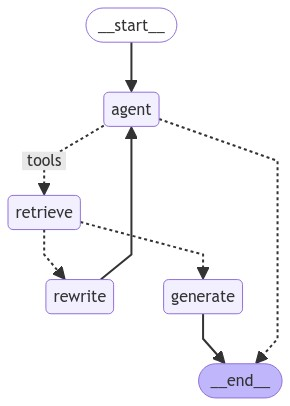

In [100]:


from IPython.display import Image, display

try:
    display(Image(graph.get_graph(xray=True).draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass


In [102]:
inputs = {
    "messages": [
        ("user", "What is land use in the context of beach litter?, please provide the relevant references."),
    ]
}
for output in graph.stream(inputs):
    for key, value in output.items():
        # print(key[0])
        # print('\n\n')
        print(value['messages'][0])
       


---CALL AGENT---
content='' additional_kwargs={'tool_calls': [{'index': 0, 'id': 'call_DzJeCtVU3Eex4R6xrDh58Wrh', 'function': {'arguments': '{"query":"land use in the context of beach litter"}', 'name': 'summarize_content'}, 'type': 'function'}]} response_metadata={'finish_reason': 'tool_calls', 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_48196bc67a'} id='run-8ea3115a-ca86-45aa-82bd-2618f08ad063-0' tool_calls=[{'name': 'summarize_content', 'args': {'query': 'land use in the context of beach litter'}, 'id': 'call_DzJeCtVU3Eex4R6xrDh58Wrh', 'type': 'tool_call'}]
---CHECK RELEVANCE---
---DECISION: DOCS RELEVANT---
content='79\naccumulation in coastal, marine and land environments (Aydin et al., 2016;\n80\nGrelaud and Ziveri, 2021; Harris et al., 2021; Pietz et al., 2021) but no such\n81\nt\nstudies have been conducted for freshwater systems. The proximity of land-\n82\no\nbased litter sources, such as recreational and urban areas might be an in-\n83\n\n79\naccumulati

# Canton Bern

## Vital Statistics

__Administrative boundaries__

In [109]:
def question_answer(question, chain, this_input: {} = None, meta_data_filter: {} = None, k: {} = {'k':4}):
    if meta_data_filter:
        new_retriever_args = {'search_search_kwargs': {**meta_data_filter, **k,'search_type':'mmr'}} 
        retriever = vectorstore.as_retriever(**new_retriever_args)
        rag_chain = create_retrieval_chain(retriever, question_answer_chain)
        response = rag_chain.invoke({'input': question},)
        return response, Markdown(response['answer']), rag_chain
        
    if this_input:
        response = chain.invoke(**this_input)
        return response, Markdown(response['answer'])

    else:
        response = chain.invoke({'input': question})
        return response, Markdown(response['answer']), 
        
    
admin_question = 'Can you tell me about the cities and lakes in the survey report from bern?'
meta_data_filter = {'Header 1': 'Survey report Bern 2015-11-15 2021-12-31', 'Header 2':'Administrative boundaries Bern 2015-11-15 2021-12-31'}
admin_boundaries, admin_reply, rag_chain = question_answer(admin_question, data_chain, meta_data_filter=meta_data_filter)
admin_reply

The survey report from Bern includes three lakes: Thunersee, Bielersee, and Brienzersee. It also encompasses a total of 19 survey locations across 13 cities within the canton of Bern. The cities represented in the data are Spiez, Vinelz, Thun, Erlach, Gals, Bönigen, Ligerz, Lüscherz, Biel/Bienne, Nidau, Brienz (BE), Beatenberg, and Unterseen.

__Summary statistics__


In [113]:
stats_questions = "how many objects were found in Bern, what was the average per meter in Bern? Can you summarize the sample totals in a table?"
meta_data_filter = {'Header 2':'Summary statistics Bern 2015-11-15 2021-12-31'}
stats_results, stats_reply, rag_chain = question_answer(stats_questions, rag_chain, meta_data_filter=meta_data_filter)
stats_reply

A total of 4,794 objects were identified in the beach-litter survey conducted in Bern. The average number of littered items recorded per meter was approximately 1.75.

Here is a summary of the sample totals in a table:

|     Metric       |    Value     |
|------------------|--------------|
| Total Objects     |    4,794     |
| Number of Samples |      74      |
| Average per Meter |   1.75       |
| 5th Percentile    |   0.11       |
| 25th Percentile   |   0.46       |
| Median (50th)     |   1.12       |
| 75th Percentile   |   2.59       |
| 95th Percentile   |   5.73       |
| Standard Deviation |   1.76       |
| Maximum           |   7.75       |
| Survey Period     | January 26, 2020 - April 8, 2021 |

## Land use

In [78]:
land_use_profile_questions = "What was the land use profile ? Can you please provide a table of values in addition to a narrative paragraph."
cluster_analysis_conc, cluster_analysis_conc_reply, rag_chain = question_answer(land_use_profile_questions, rag_chain, meta_data_filter={'Header 2': 'Land use profile Bern 2015-11-15 2021-12-31'})
cluster_analysis_conc_reply

The land use profile around the survey locations in the Canton of Bern indicates varying proportions of different topographical features within a 1500m radius. The data is organized into indices that represent different ranges of land use proportions. The findings show a higher attribution to buildings compared to agriculture and woodland, with a notable presence of recreation areas as well. The table below summarizes the values for each index:

| Index | Buildings | Wetlands | Forest | Public Services | Recreation | Undefined | Streets | Vineyards | Orchards |
|-------|-----------|----------|--------|------------------|------------|------------|---------|-----------|----------|
| 1     | 0.310811  | 1        | 0.243243| 1                | 1          | 0.351351   | 0       | 1         | 1        |
| 2     | 0.378378  | 0        | 0.662162| 0                | 0          | 0.0810811  | 0       | 0         | 0        |
| 3     | 0.216216  | 0        | 0.0945946| 0               | 0          | 0.567568   | 0       | 0         | 0        |
| 4     | 0.0675676 | 0        | 0      | 0                | 0          | 0          | 0       | 0         | 0        |
| 5     | 0.027027  | 0        | 0      | 0                | 0          | 0          | 0       | 0         | 0        |

In the land use profile, the first index (0-20%) shows that buildings accounted for approximately 31%, wetlands for 100%, and forests for around 24%, indicating a diverse environment with significant recreational and public service areas. As the indices increase, the representation of buildings tends to vary, peaking at index two with nearly 38% but declining in subsequent indices, while wetlands and forests show varying proportions. Notably, there are no contributions from public services, recreation, streets, vineyards, or orchards in higher indices, suggesting a shift towards less developed land use as the index increases. Overall, the analysis of land use characteristics suggests that survey locations are predominantly influenced by urban development, with significant implications for litter accumulation along shorelines.

### Cluster analysis

In [42]:
cluster_analysis_questions = "What were the results of the cluster analysis (composition of clusters)? What was the average density per cluster ? Can you please provide a table of values with a caption in addition to a narrative paragraph."
cluster_analysis_conc, cluster_analysis_conc_reply, rag_chain = question_answer(cluster_analysis_questions, rag_chain, meta_data_filter={'Header 2': 'Cluster analysis Bern 2015-11-15 2021-12-31'})
cluster_analysis_conc_reply

The cluster analysis of beach-litter survey data from lakes in the Canton of Bern resulted in the identification of six distinct clusters, each characterized by varying proportions of land use types, including public services, buildings, forest, undefined land, vineyards, streets, and recreation. Additionally, each cluster exhibited different average densities of litter measured in objects per meter of beach.

Below is a table summarizing the composition of each cluster along with their average densities:

| Cluster | Public Services | Buildings | Forest | Undefined Land | Vineyards | Streets | Recreation | Average Density (objects/m) |
|---------|-----------------|-----------|--------|----------------|-----------|---------|------------|------------------------------|
| 0       | 0.024           | 0.591     | 0.22   | 0.189          | 0         | 0.363896| 0.005      | 2.39038                      |
| 1       | 0.007           | 0.159     | 0.537  | 0.245          | 0         | 0.0845193| 0.005      | 0.378571                     |
| 2       | 0.061           | 0.309     | 0.107  | 0.541          | 0.02      | 0.49708 | 0.025      | 2.21333                      |
| 3       | 0.003           | 0.047     | 0.271  | 0.55           | 0         | 0       | 0.155      | 1.23667                      |
| 4       | 0.044           | 0.682     | 0.153  | 0.149          | 0.015     | 0.251846| 0.005      | 0.884                        |
| 5       | 0.188           | 0.14      | 0.308  | 0.297          | 0.192     | 0.273278| 0.014      | 4.945                        |

**Table 1: Composition of Clusters and Average Density of Beach Litter**

The data reveals significant diversity among the clusters. Cluster 0 and Cluster 2 exhibit relatively high average densities of litter, at 2.39038 and 2.21333 objects per meter, respectively. In contrast, Cluster 1 shows a notably low average density of 0.378571 objects per meter. Cluster 5 stands out with the highest density of 4.945 objects per meter, indicating a high concentration of litter in this cluster. The composition of land use varies considerably, with clusters such as Cluster 4 having a high proportion of buildings (0.682) and Cluster 1 having a higher proportion of forest (0.537). This analysis provides insight into the distribution and characteristics of litter across different beach environments, highlighting areas that may require more focused waste management efforts.

## Regression Analysis

In [43]:
regression_questions = "What were the regression results? Can provide these in paragraph format with tables of values. Please label each paragraph according to use."
regression_questions, regression_questions_reply, rag_chain = question_answer(regression_questions, rag_chain, meta_data_filter={'Header 2': 'Regression results Bern'})
regression_questions_reply

### Regression Results Overview

In our analysis of the beach-litter survey data, we evaluated several regression models to determine their effectiveness in predicting outcomes. The results of the various models are summarized in the table below:

|    | Model                        |       R² |      MSE |
|---:|:-----------------------------|---------:|---------:|
|  0 | Linear Regression            | 0.354129 | 0.316131 |
|  1 | Random Forest Regression     | 0.034878 | 0.472393 |
|  2 | Gradient Boosting Regression | 0.244038 | 0.370016 |
|  3 | Theil-Sen Regressor         | 0.385913 | 0.300574 |
|  4 | Bagging: Theil-Sen Regressor| 0.369834 | 0.308444 |
|  5 | Voting                       | 0.28676  | 0.349106 |

### Best Performing Model

Among the models assessed, the Theil-Sen Regressor emerged as the most effective, achieving an R² value of 0.385913 alongside a mean squared error (MSE) of 0.300574. This indicates that the model was able to explain a significant proportion of the variance in the data, outperforming other models in the analysis. The Bagging: Theil-Sen Regressor also performed well, with an R² of 0.369834 and an MSE of 0.308444, making it a viable alternative.

### Performance of Other Models

The Linear Regression model yielded a respectable R² value of 0.354129 and an MSE of 0.316131, showing moderate predictive capability. Conversely, the Random Forest Regression significantly underperformed with an R² of just 0.034878 and an MSE of 0.472393, suggesting it was not suitable for this dataset. The Gradient Boosting Regression yielded an R² of 0.244038 and an MSE of 0.370016, while the Voting model had an R² of 0.28676 and an MSE of 0.349106, indicating that both models had limited effectiveness compared to the top-performing options.

### Regression observations

In [44]:
regression_questions = "Considereing the regression results and the top performing model. Can we make any conclusions about the effect of the feature variables on object density? Given the r² and MSE how reliable would predictions be?"
regression_questions, regression_questions_reply, rag_chain = question_answer(regression_questions, rag_chain, meta_data_filter={'Header 2': 'Summary of regression results Bern 2015-11-15 2021-12-31'})
regression_questions_reply

The analysis of the regression results indicates that the Theil-Sen Regressor is the top-performing model, achieving the highest R² value of 0.385913 and a mean squared error (MSE) of 0.300574. This suggests that the model explains approximately 38.59% of the variance in the object density, which indicates a moderate level of explanatory power. However, it also implies that a significant portion (over 61%) of the variance is not explained by the model.

The MSE of 0.300574 indicates the average squared difference between the predicted values and the actual values. While a lower MSE suggests better predictions, the context of the data and the specific application would determine how acceptable this level of prediction error is.

Regarding the effect of the feature variables on object density, the feature importance analysis reveals that streets have the highest importance coefficient (0.480289), suggesting that they have a substantial impact on object density. Other important features include public-services (0.213802), recreation (0.204981), and forest (0.137992). Conversely, vineyards and buildings have negative or minimal importance coefficients, indicating that they may have negligible effects on object density.

In summary, while the Theil-Sen Regressor provides some insights into the effect of feature variables on object density, the moderate R² value and the MSE suggest that predictions may not be highly reliable. Further analysis, possibly incorporating additional features or different modeling techniques, could enhance predictive power and provide a clearer understanding of the effects of the features on object density.

## Most Common

In [45]:
most_common_questions = "According to survey results, what were the most important inventory items from Bern?"
most_common, most_common_reply, rag_chain = question_answer(most_common_questions, rag_chain, meta_data_filter={'Header 1':'Survey report Bern 2015-11-15 2021-12-31', 'Header 2': 'Inventory items Bern 2015-11-15 2021-12-31'})
most_common_reply

I don't know.

In [46]:
most_common_questions = "What were the Inventory items in Bern? Please provide a table of values with the object name. Include the % of  total, the quantity, fail rate and pcs/m"
most_common, most_common_reply, rag_chain = question_answer(most_common_questions, rag_chain, meta_data_filter={'Header 1':'Survey report Bern 2015-11-15 2021-12-31', 'Header 2': 'Inventory items Bern 2015-11-15 2021-12-31'})
most_common_reply

Here is the table of inventory items collected in Bern, including the object name, % of total, quantity, fail rate, and pcs/m:

| Object Name                                                           | % of Total | Quantity | Fail Rate  | pcs/m       |
|----------------------------------------------------------------------|------------|----------|------------|-------------|
| Cigarette filters                                                     | 32.6%      | 1,563    | 0.837838   | 0.475676    |
| Fragmented plastics                                                  | 26.7%      | 1,283    | 0.945946   | 0.535676    |
| Food wrappers; candy, snacks                                         | 11.8%      | 565      | 0.824324   | 0.21527     |
| Industrial sheeting                                                 | 13.8%      | 661      | 0.864865   | 0.272432    |
| Foam packaging/insulation/polyurethane                               | 4.7%       | 227      | 0.891892   | 0.0363971   |
| Industrial pellets (nurdles)                                        | 3.9%       | 186      | 0.364865   | 0.0618919   |
| Straws and stirrers                                                 | 1.1%       | 52       | 0.391892   | 0.02        |
| Bags/sacks heavy duty plastic for 25 Kg or more; animal feed, etc. | 0.0004%    | 2        | 0.027027   | 0.00148649  |
| Coverings; plastic packaging, sheeting for protecting large cargo    | 0.0006%    | 3        | 0.0405405  | 0.00189189  |
| Glove industrial/professional                                        | 0.0002%    | 1        | 0.0135135  | 0.00027027  |
| Tags fishing or industry (security tags, seals)                     | 0.0004%    | 2        | 0.027027   | 0.000810811 |
| Buckets                                                             | 0.0017%    | 8        | 0.0405405  | 0.00162162  |
| Straps/bands; hard, plastic package fastener                        | 0.006%     | 29       | 0.297297   | 0.0101351   |
| Fiberglass fragments                                                 | 0.001%     | 5        | 0.0675676  | 0.00256757  |
| Tape, masking/duct/packing                                           | 0.007%     | 32       | 0.22973    | 0.0101351   |
| Plastic construction waste                                           | 0.033%     | 159      | 0.608108   | 0.0677027   |
| Cable ties; steggel, zip, zap straps                                 | 0.003%     | 16       | 0.148649   | 0.00959459  |
| Injection gun cartridge                                              | 0%         | 0        | 0          | 0           |
| Car parts                                                           | 0%         | 0        | 0          | 0           |

This table summarizes the collected litter items along with their associated metrics.